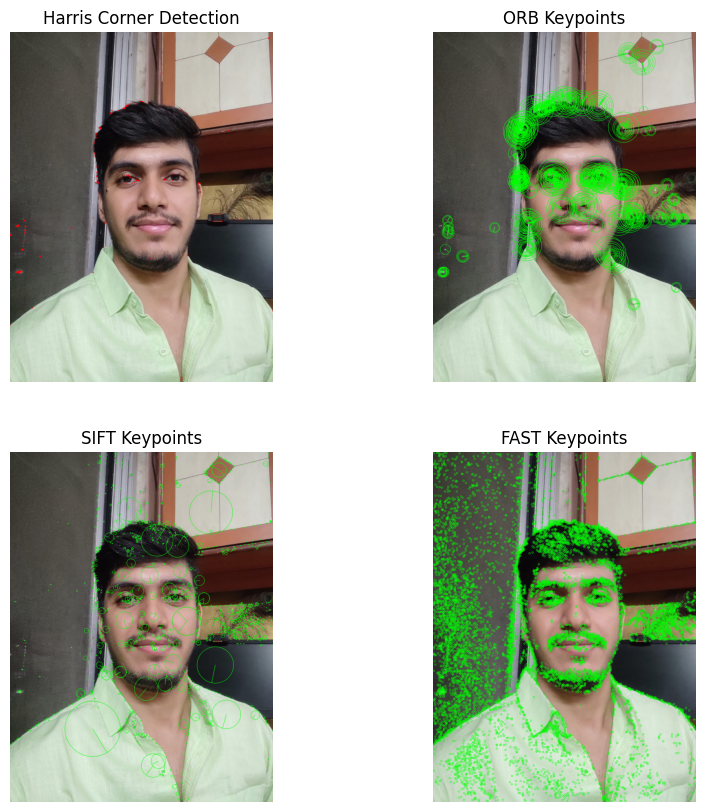

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load an image
path = 'image.jpg'
image = cv2.imread(path, cv2.IMREAD_COLOR)
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Harris Corner Detection
gray_harris = np.float32(gray)
dst = cv2.cornerHarris(gray_harris, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
image_harris = image.copy()
image_harris[dst > 0.01 * dst.max()] = [0, 0, 255]
# ORB Feature Detection
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)
image_with_keypoints_orb = cv2.drawKeypoints(image.copy(), keypoints_orb, None, (0, 255, 0), 4)
# SIFT Feature Detection
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(gray, None)
image_with_keypoints_sift = cv2.drawKeypoints(image.copy(), keypoints_sift, None, (0, 255, 0), 4)
# FAST Feature Detection
fast = cv2.FastFeatureDetector_create()
keypoints_fast = fast.detect(gray, None)
image_with_keypoints_fast = cv2.drawKeypoints(image.copy(),
keypoints_fast, None, (0, 255, 0))
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# Plot the images in subplots
axes[0, 0].imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Harris Corner Detection')
axes[0, 1].imshow(cv2.cvtColor(image_with_keypoints_orb,
cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('ORB Keypoints')
axes[1, 0].imshow(cv2.cvtColor(image_with_keypoints_sift,
cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('SIFT Keypoints')
axes[1, 1].imshow(cv2.cvtColor(image_with_keypoints_fast,
cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('FAST Keypoints')
# Remove axis labels
for ax in axes.flatten():
    ax.axis('off')
plt.show()